# Assignment 1

## Simplified Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define initial masses
M10 = 725
M20 = 725
M50 = 110
M70 = 60

# define the fluxes
F12 = 90
F21 = 90
F15 = 110
F51 = 55
F57 = 55
F71 = 55
F72 = 0

# compute the rate constants
k12 = F12/M10
k21 = F21/M20
k15 = F15/M10
k51 = F51/M50
k57 = F57/M50
k71 = F71/M70
k72 = F72/M70

print(1/k12)
print(1/k21)
print(1/k15)
print(1/k51)
print(1/k57)
print(1/k71)
print(k72)

8.055555555555555
8.055555555555555
6.590909090909091
2.0
2.0
1.090909090909091
0.0


Load in the forcing data from the A2 emission scenario

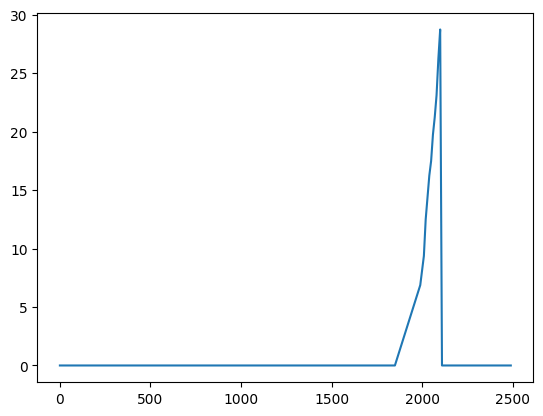

In [2]:
def emissions(yr):
    
    # Function defining A2 emission scenario over the interval 1990-2100
    # extended to pre-industrial (assuming linear increase from 0 in 1850 to 1900) and assuming full cessation of CO_2 input at 2101
    #
    # Example of use:
    #     import numpy as np
    #     import matplotlib.pyplot as plt
    #     yr = np.arange(0,2500, 10)
    #     e = emissions(yr)
    #     plt.plot(yr, e)
    #     plt.show()
    
    # For additional information see http://www.grida.no/climate/ipcc/emission    
    
    t_yr = np.array([0, 1850, 1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100, 2110, 2120, 10000])
    
    # CO2 forcing stops at 2100: note that need some zeros close in time to approximate stepwise shutoff with linear interp
    
    e_GtC_yr = np.array([0, 0,  6.875, 8.125, 9.375, 12.5, 14.375, 16.25, 17.5, 19.75, 21.25, 23.125, 26.25, 28.75, 0, 0, 0])
    
    e = np.interp(yr, t_yr, e_GtC_yr)
    
    return e

yr = np.arange(0,2500, 10)
e = emissions(yr)
plt.plot(yr, e)
plt.show()

In [3]:
# define euler equation

def euler_update(m10, m20, m50, m70, dt, F_force):
    # compute the updated masses for one iteration of the euler method
    m1 = m10 + dt * ((k21*m20 + k51*m50 + k71*m70) - (k12 + k15)*m10 + F_force)
    m2 = m20 + dt * (k12*m10 + k72*m70 - k21*m20)
    m5 = m50 + dt * (k15*m10 - k51*m50 - k57*m50)
    m7 = m70 + dt * (k57*m50 - k71*m70 - k72*m70)
    return m1, m2, m5, m7

Test this by computing the emissions between 1800 and 2200

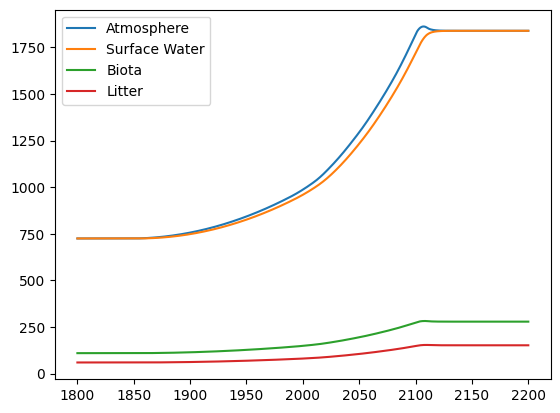

In [4]:
# dt = 1.85      # time in years
dt = 0.5      # time in years
t_start = 1800
t_end = 2200
Nt = int((t_end - t_start) / dt)

for i in range(Nt):
    year = t_start + i*dt
    # compute the forced emission for a given year
    force_emissions = emissions(year)
    if i == 0:
        # assign the initial steady state masses to start
        masses = (M10, M20, M50, M70)
        mass_array = np.array(masses)
    else:
        # update the masses with the euler step updtae every iteration
        masses = euler_update(*masses, dt=dt, F_force=force_emissions)
        # save the masses from each step to an array
        mass_array = np.vstack([mass_array, masses])

# plot the results
tt = np.linspace(t_start, t_end, Nt)
plt.plot(tt, mass_array, label=["Atmosphere", "Surface Water", "Biota", "Litter"])
plt.legend()
plt.show()
    

## 9 Box Model

In [5]:
# define the initial fluxes
# diagonals correspond to source/drain terms
F0 = np.array([[0, 89, 0, 0, 110, 0, 0, 0, 0],
               [90, 0, 40, 38, 0, 0, 0, 0, 0],
               [0, 36, 0, 4, 0, 0, 0, 0, 0],
               [0, 42, 0, 0, 0, 0, 0, 0, 0],
               [55, 0, 0, 0, 0, 15, 40, 0, 0],
               [0, 0, 0, 0, 0, 0, 15, 0, 0],
               [50, 1, 0, 0, 0, 0, 0, 3, 1],
               [3, 0, 0, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 0, 0, 0]])
# define the initial masses
M0 = np.array([725, 725, 3, 37675, 110, 450, 60, 1350, 160])
# compute the rate terms
kk = F0 / M0[:, np.newaxis]

$$M_{i}^{(n+1)}=M_i^n+\Delta t \frac{dM_i^n}{dt},\quad \frac{dM_i^n}{dt}=\sum_{i,j} k_{ij}M_i$$

In [6]:
def update9box(masses0, dt, forcing):
    fluxes = kk * masses0[:,np.newaxis]
    masses = masses0 + dt * (np.sum(fluxes, axis=0) - np.sum(fluxes, axis=1) + forcing)
    return masses

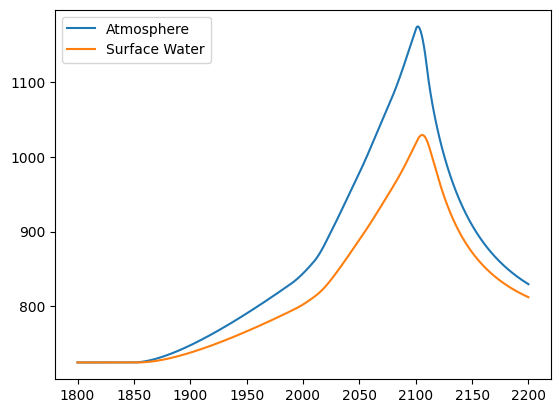

In [7]:
dt = 0.01      # time in years
t_start = 1800
t_end = 2200
Nt = int((t_end - t_start) / dt)

for i in range(Nt):
    year = t_start + i*dt
    # compute the forced emission for a given year
    force_emissions = np.zeros(9)
    force_emissions[0] = emissions(year)
    if i == 0:
        # assign the initial steady state masses to start
        masses = M0
        mass_array = masses.copy()
    else:
        # update the masses with the euler step update every iteration
        masses = update9box(masses, dt, force_emissions)
        # save the masses from each step to an array
        mass_array = np.vstack([mass_array, masses])

# plot the results
tt = np.linspace(t_start, t_end, Nt)
plt.plot(tt, mass_array[:,:2], label=["Atmosphere", "Surface Water"])
# plt.plot(tt, mass_array)
plt.legend()
plt.show()

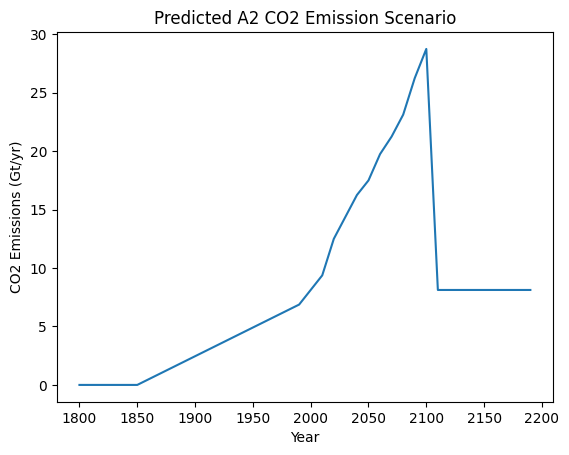

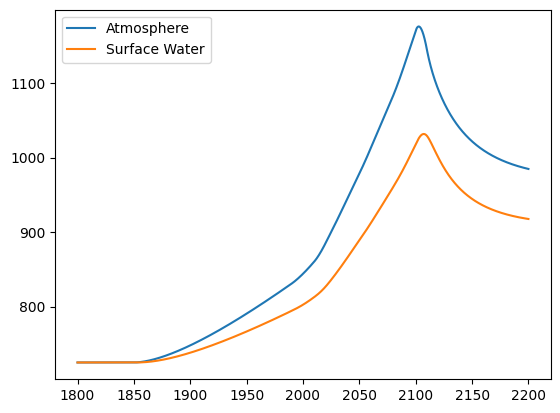

In [16]:
def updated_emissions(yr):
    
    t_yr = np.array([0, 1850, 1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100, 2110, 2120, 10000])
    
    # CO2 forcing stops at 2100: note that need some zeros close in time to approximate stepwise shutoff with linear interp
    
    e_GtC_yr = np.array([0, 0,  6.875, 8.125, 9.375, 12.5, 14.375, 16.25, 17.5, 19.75, 21.25, 23.125, 26.25, 28.75, 8.125, 8.125, 8.125])
    
    e = np.interp(yr, t_yr, e_GtC_yr)
    
    return e

yr = np.arange(1800,2200, 10)
e = updated_emissions(yr)
plt.plot(yr, e)
plt.title("Predicted A2 CO2 Emission Scenario")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Gt/yr)")
plt.show()

dt = 0.01      # time in years
t_start = 1800
t_end = 2200
Nt = int((t_end - t_start) / dt)

for i in range(Nt):
    year = t_start + i*dt
    # compute the forced emission for a given year
    force_emissions = np.zeros(9)
    force_emissions[0] = updated_emissions(year)
    if i == 0:
        # assign the initial steady state masses to start
        masses = M0
        mass_array = masses.copy()
    else:
        # update the masses with the euler step update every iteration
        masses = update9box(masses, dt, force_emissions)
        # save the masses from each step to an array
        mass_array = np.vstack([mass_array, masses])

# plot the results
tt = np.linspace(t_start, t_end, Nt)
plt.plot(tt, mass_array[:,:2], label=["Atmosphere", "Surface Water"])
# plt.plot(tt, mass_array)
plt.legend()
plt.show()

Curve fitting the forest fire emissions and global temperature

[ 6.84590801  2.10279864 13.91229141]


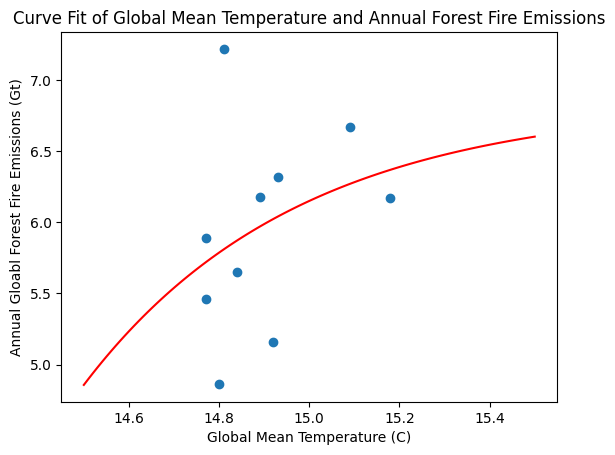

In [12]:
from scipy.optimize import curve_fit

years = range(2004, 2025)
temp = 13.9 + np.array([0.56, 0.69, 0.65, 0.64, 0.54, 0.67, 0.73, 0.61, 0.65, 0.68, 0.75,
                       0.91, 1.03, 0.94, 0.87, 0.99, 1.02, 0.87, 0.9, 1.19, 1.28])
fireCO2 = np.array([7.37, 7.15, 6.87, 7.28, 6.53, 6.09, 6.4, 6.76, 7.39, 5.78, 6.43, 7.22, 6.32,
                   5.65, 5.46, 6.18, 5.16, 5.89, 4.86, 6.67, 6.17])

def fire_temp_curve(temp, a, b, t0):
    return np.maximum(a * (1 - np.exp(-b*(temp-t0))), 0)

popt = curve_fit(fire_temp_curve, temp[-10:], fireCO2[-10:], p0 = [10, 1, 13])[0]
print(popt)

plt.scatter(temp[-10:], fireCO2[-10:])
plt.plot(np.linspace(14.5,15.5,100), fire_temp_curve(np.linspace(14.5,15.5,100), *popt), c="red")
plt.title("Curve Fit of Global Mean Temperature and Annual Forest Fire Emissions")
plt.xlabel("Global Mean Temperature (C)")
plt.ylabel("Annual Gloabl Forest Fire Emissions (Gt)")
plt.show()

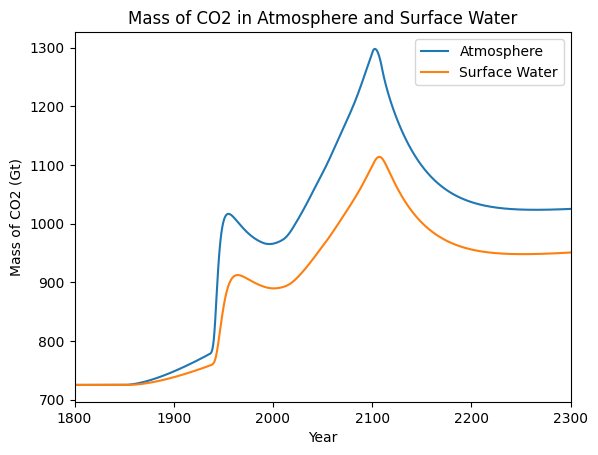

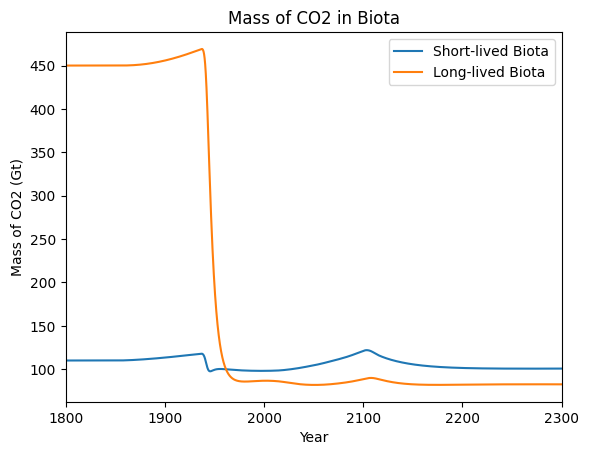

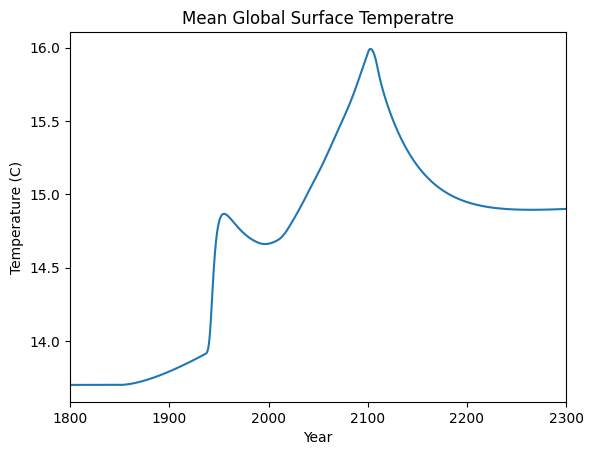

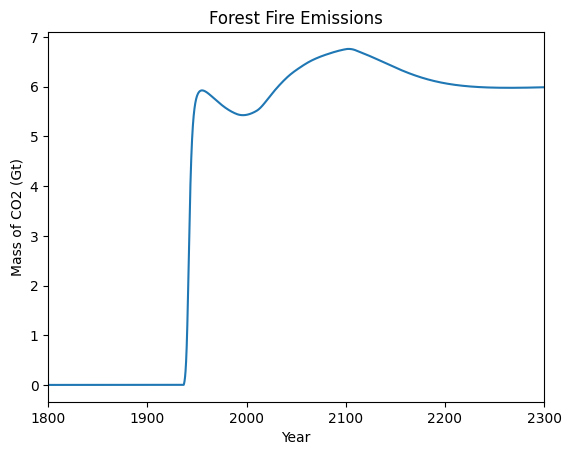

In [17]:
# define the initial fluxes
# diagonals correspond to source/drain terms
F0 = np.array([[0, 89, 0, 0, 110, 0, 0, 0, 0],
               [90, 0, 40, 38, 0, 0, 0, 0, 0],
               [0, 36, 0, 4, 0, 0, 0, 0, 0],
               [0, 42, 0, 0, 0, 0, 0, 0, 0],
               [55, 0, 0, 0, 0, 15, 40, 0, 0],
               [0, 0, 0, 0, 0, 0, 15, 0, 0],
               [50, 1, 0, 0, 0, 0, 0, 3, 1],
               [3, 0, 0, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 0, 0, 0]])
# define the initial masses
M0 = np.array([725, 725, 3, 37675, 110, 450, 60, 1350, 160])
# compute the rate terms
kk = F0 / M0[:, np.newaxis]


dt = 0.01      # time in years
t_start = 1700
t_end = 2300
Nt = int((t_end - t_start) / dt)

# pre-industrial global mean temperature
T_pre_ind = 13.7
# atmospheric carbon and temperature in the 50s
T_50s = 14
C_50s = 800
# proportionality between C and T
kCT = (T_50s - T_pre_ind) / (C_50s - M0[0])

def updateffmodel(masses0, dt, forcing):
    T_new = kCT * (masses0[0] - M0[0]) + T_pre_ind
    # modulate temperature
    # T_new *= 20 * np.sin(2*np.pi*year)
    fire_CO2 = fire_temp_curve(T_new, *popt) * 10
    # modulate for seasonality
    # fire_CO2 = np.pi / 2 * fire_temp_curve(T_new, *popt) * np.abs(np.sin(np.pi * year))
    fluxes = kk * masses0[:,np.newaxis]
    fluxes[5,0] = fire_CO2 * masses0[5] / M0[5]
    fluxes[4,0] += fire_CO2 * masses0[4] / M0[4]
    changes = (np.sum(fluxes, axis=0) - np.sum(fluxes, axis=1) + forcing)
    masses = masses0 + dt * changes
    
    return masses

for i in range(Nt):
    year = t_start + i*dt
    # compute the forced emission for a given year
    force_emissions = np.zeros(9)
    force_emissions[0] = updated_emissions(year)
    if i == 0:
        # assign the initial steady state masses to start
        masses = M0
        mass_array = masses.copy()
    else:
        # update the masses with the euler step update every iteration
        masses = updateffmodel(masses, dt, force_emissions)
        # save the masses from each step to an array
        mass_array = np.vstack([mass_array, masses])

# plot the results
plot_start = 1800
tt = np.linspace(t_start, t_end, Nt)
plt.plot(tt, mass_array[:,:2], label=["Atmosphere", "Surface Water"])
plt.legend()
plt.title("Mass of CO2 in Atmosphere and Surface Water")
plt.xlim((plot_start, t_end))
plt.xlabel("Year")
plt.ylabel("Mass of CO2 (Gt)")
plt.show()

plt.plot(tt, mass_array[:,4:6], label=["Short-lived Biota", "Long-lived Biota"])
plt.legend()
plt.title("Mass of CO2 in Biota")
plt.xlim((plot_start, t_end))
plt.xlabel("Year")
plt.ylabel("Mass of CO2 (Gt)")
plt.show()

temp_over_time = kCT * (mass_array[:,0] - M0[0]) + T_pre_ind
plt.plot(tt, temp_over_time)
plt.title("Mean Global Surface Temperatre")
plt.xlim((plot_start, t_end))
plt.xlabel("Year")
plt.ylabel("Temperature (C)")
plt.show()

fire_emissions = fire_temp_curve(temp_over_time, *popt)
# fire_emissions = np.pi / 2 * fire_temp_curve(temp_over_time, *popt) * np.abs(np.sin(np.pi * tt))
plt.plot(tt, fire_emissions)
plt.title("Forest Fire Emissions")
plt.xlim((plot_start, t_end))
plt.xlabel("Year")
plt.ylabel("Mass of CO2 (Gt)")
plt.show()